<a href="https://colab.research.google.com/github/HemanthBodduboinagithub/CNN--project/blob/main/Hand_digits_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
! pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.13.0'

In [ ]:
tf.keras

<module 'keras.api._v2.keras' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/__init__.py'>

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# x_train - trainig images
# y_train - training labels

# x_test - testing images
# y_test - testing labels

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The label of this image is :6


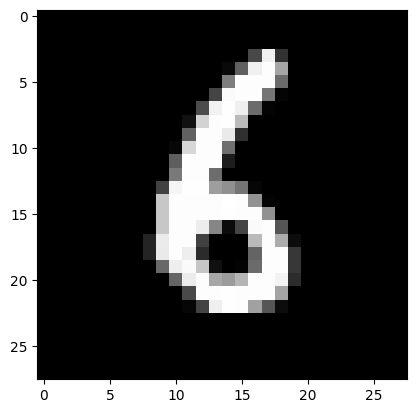

In [ ]:
plt.imshow(x_train[1020], cmap="gray")
print(f"The label of this image is :{y_train[1020]}")

The label of this image is : 8


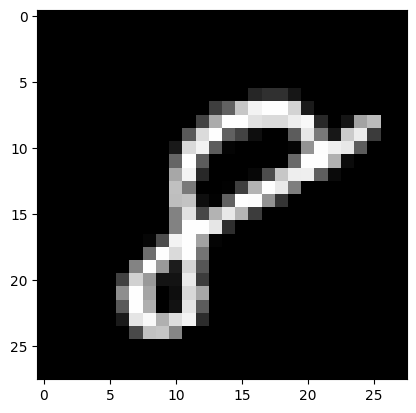

In [ ]:
#np.random.randint(0,60000)
rand_num = 59999
if rand_num < 60000 and rand_num >= 0 :
  plt.imshow(x_train[rand_num], cmap="gray")
  print(f"The label of this image is : {y_train[rand_num]}")
else:
  print("Array has only 60000 images")

The label of this image is :0


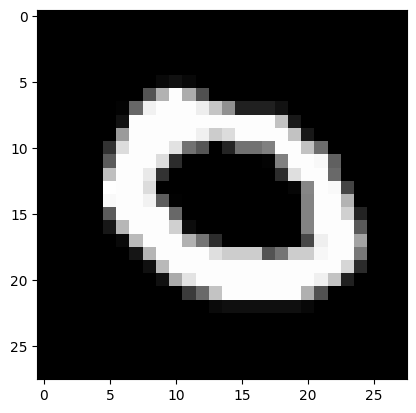

In [ ]:
z = np.random.randint(0,60000)
plt.imshow(x_train[z], cmap = "gray")
print(f"The label of this image is :{y_train[z]}")

In [ ]:
# check for the class imbalance i,e In MNIST we have 10 digits check that all digits have similar images
pd.DataFrame(y_train).value_counts(normalize=True)*100 #.plot.bar()

#import pandas as pd

data = {'Name': ['John', 'Jane', 'Bob'],
        'Age': [25, 30, 35],
        'City': ['New York', 'San Francisco', 'Los Angeles']}
df = pd.DataFrame(data)

In [ ]:
df.describe

<bound method NDFrame.describe of    Name  Age           City
0  John   25       New York
1  Jane   30  San Francisco
2   Bob   35    Los Angeles>

In [ ]:
# check for the class imbalance i,e In MNIST we have 10 digits check that all digits have similar images
pd.DataFrame(y_train).value_counts() #(normalize=True)*100 #.plot.bar()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [ ]:
# plot 10 rnadom images of TWO
index = np.random.choice(np.where(y_train == 2)[0], 10)
index

array([ 9092, 44149, 40409, 47612, 50457, 23325, 28859, 10029, 31837,
       17272])

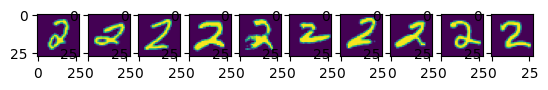

In [ ]:
for e, i in enumerate(index) :
  plt.subplot(1,10,e+1)
  plt.imshow(x_train[i])

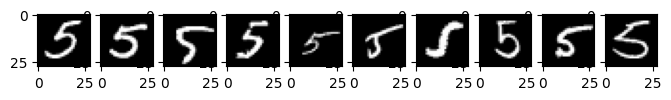

In [ ]:
#plot 10 random images of 5
digit = 5
index = np.random.choice(np.where(y_train == 5)[0],10)
plt.figure(figsize=(8,8))
for e, i in enumerate(index) :
  plt.subplot(1,10,e+1)
  plt.imshow(x_train[i],cmap='gray')

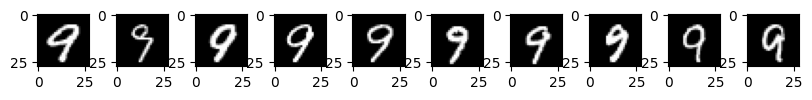

In [ ]:
plt.figure(figsize=(10,8))
for d in np.arange(0, 10):
  d = digit
  index = np.random.choice(np.where(y_train == digit)[0], 10)
  for e,i in enumerate(index):
    plt.subplot(10, 10, d*10 + e+1)
    plt.imshow(x_train[i], cmap="gray")



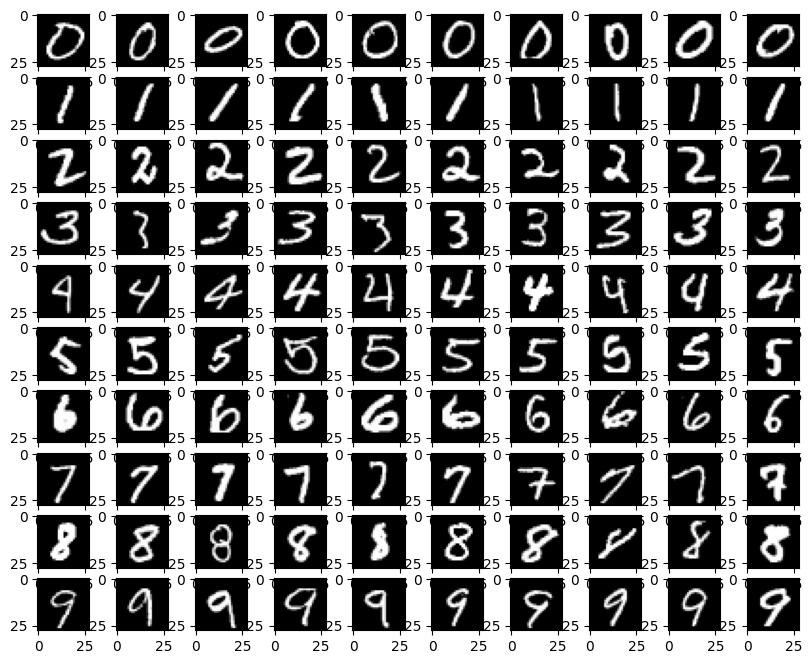

In [ ]:
plt.figure(figsize=(10, 8))
for d in np.arange(0, 10):
  digit = d
  index = np.random.choice(np.where(y_train == digit)[0], 10)
  for e,i in enumerate(index):
    plt.subplot(10, 10, d*10 + e+1)
    plt.imshow(x_train[i], cmap="gray")